In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
print (tf.__version__)

2.0.0-rc1


In [3]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 407s 2us/step


In [6]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255
print (x_train_scaled.shape)

K = len(set(y_train.flatten()))
print (K)

(50000, 32, 32, 3)
10


In [22]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization
from tensorflow.keras.models import Model

In [24]:
i = Input(shape=x_train_scaled[0].shape)
x = Conv2D(filters=32, kernel_size=(2,2), strides=2, activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(filters=64, kernel_size=(2,2), strides=2, activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(filters=128, kernel_size=(2,2), strides=2, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = Flatten()(x)
x = Dense(200, activation='relu')(x)
o = Dense(K, activation='softmax')(x)

model = Model(i,o)
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        416       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 128)         32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 4, 4, 128)         512 

In [25]:
history = model.fit(x_train_scaled, y_train, epochs=10, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 23s 585us/sample - loss: 1.5461 - accuracy: 0.4410 - val_loss: 1.3722 - val_accuracy: 0.5128
Epoch 2/10
40000/40000 [==============================] - 24s 593us/sample - loss: 1.2333 - accuracy: 0.5544 - val_loss: 1.3915 - val_accuracy: 0.5049
Epoch 3/10
40000/40000 [==============================] - 24s 601us/sample - loss: 1.0826 - accuracy: 0.6103 - val_loss: 1.1754 - val_accuracy: 0.5795
Epoch 4/10
40000/40000 [==============================] - 25s 624us/sample - loss: 0.9767 - accuracy: 0.6518 - val_loss: 1.1894 - val_accuracy: 0.5856
Epoch 5/10
40000/40000 [==============================] - 23s 568us/sample - loss: 0.8866 - accuracy: 0.6831 - val_loss: 1.1982 - val_accuracy: 0.5918
Epoch 6/10
40000/40000 [==============================] - 21s 528us/sample - loss: 0.7991 - accuracy: 0.7143 - val_loss: 1.1320 - val_accuracy: 0.6198
Epoch 7/10
40000/40000 [====================

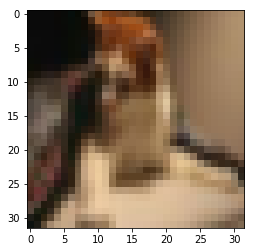

predicted label is: 3
actual label is: [3]


In [30]:
import matplotlib.pyplot as plt

imgNum = np.random.randint(0,1000)
plt.imshow(x_test_scaled[imgNum])
plt.show()

tstimg = x_test_scaled[imgNum].reshape(1,32, 32, 3)
predlbl = model.predict(tstimg)
print ('predicted label is:', predlbl.argmax())
print ('actual label is:',y_test[imgNum])